### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [3]:
df = pd.read_csv(r"C:\Users\V.MANOHAR\data\data.csv")

In [4]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


### Missing Value Treatment

In [5]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [6]:
df.shape

(2227, 3)

In [7]:
 df['x1'] = df['x1'].fillna(0)

In [8]:
 df['x2'] = df['x2'].fillna(0)

In [9]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

### Outlier Treatment

<AxesSubplot:xlabel='x1'>

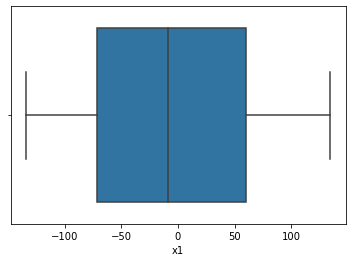

In [10]:
sns.boxplot(data=df,x= 'x1')

<AxesSubplot:xlabel='x2'>

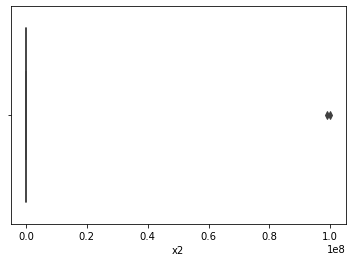

In [11]:
sns.boxplot(data=df,x= 'x2')

In [12]:
q1 = df['x2'].quantile(0.25)
q3 = df['x2'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
for i in df['x2']:
    if i > Upper_tail or i < Lower_tail:
            df['x2'] = df['x2'].replace(i, 0)

<AxesSubplot:xlabel='x2'>

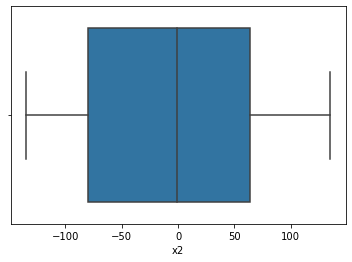

In [13]:
sns.boxplot(df['x2'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2227 non-null   float64
 1   x2      2227 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


### Visualise the data

In [15]:
print('x1 max value')
print(df.x1.max())
print()
print('x1 min value')
print(df.x1.min())

x1 max value
134.5086874

x1 min value
-134.3691605


In [16]:
print('x2 max value')
print(df.x1.max())
print()
print('x2 min value')
print(df.x1.min())

x2 max value
134.5086874

x2 min value
-134.3691605


<AxesSubplot:xlabel='y', ylabel='count'>

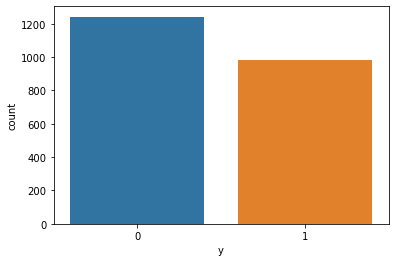

In [17]:
sns.countplot(data=df,x='y')

#### We observe that Output y variable has more 0's and less 1's

<AxesSubplot:xlabel='y', ylabel='x1'>

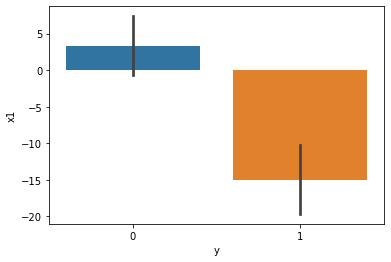

In [18]:
sns.barplot(data=df,x='y',y='x1')

#### We observe that outputs 0's are having only positives in x1 variable and 1's having more in negative and less in positives

<AxesSubplot:xlabel='y', ylabel='x2'>

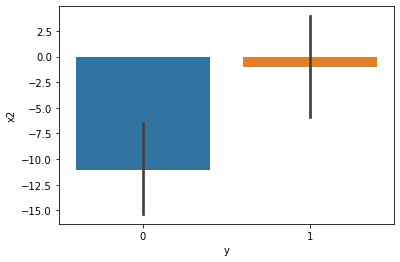

In [19]:
sns.barplot(data=df,x='y',y='x2')

#### We observe that in x2 variable we have only 0's output and there is no 1's 

<AxesSubplot:ylabel='y'>

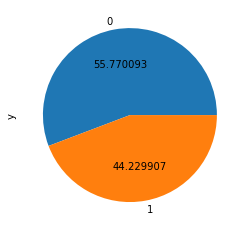

In [20]:
df.y.value_counts().plot(kind='pie',autopct='%2f',figsize = (4,4))

#### We observe that 0's output has more than the 1's output

## Machine Learning Model Building

### Standardised Data

In [21]:
target = df['y']
data = df.drop("y",axis=1)

In [22]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

In [23]:
print(data.shape)
print(target.shape)

(2227, 2)
(2227,)


In [24]:
X = df.drop('y',axis = 1)
y= df['y']

In [25]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(2227, 2)


### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(standardized_data,y,train_size=0.8,random_state=0)

In [28]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1781, 2) (1781,)
(446, 2) (446,)


In [29]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

## Model Building - Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### HyperParameter Tuning

In [31]:
tuned_parameters = [{'C':[1, 2, 3, 4, 5]}]

evaluation_metric = ['accuracy','precision','recall','roc_auc']

for i in evaluation_metric:
    clf = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(X_test, y_test))
    print()

for accuracy
Best parameters set found on train set:
{'C': 1}
LogisticRegression(C=1)
0.7331838565022422

for precision
Best parameters set found on train set:
{'C': 1}
LogisticRegression(C=1)
0.967032967032967

for recall
Best parameters set found on train set:
{'C': 1}
LogisticRegression(C=1)
0.43137254901960786

for roc_auc
Best parameters set found on train set:
{'C': 3}
LogisticRegression(C=3)
0.5590868578836492



In [32]:
y_pred = classifier.predict(X_test)

### F1 score

In [33]:
from sklearn import metrics
metrics.f1_score(y_test,y_pred)

0.5966101694915255

### Confusion Matrix

In [34]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[239,   3],
       [116,  88]], dtype=int64)

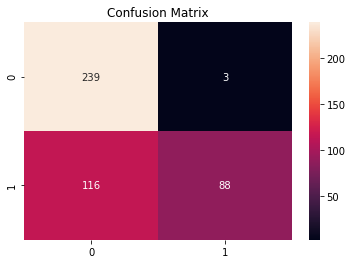

In [35]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [36]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.99      0.80       242
           1       0.97      0.43      0.60       204

    accuracy                           0.73       446
   macro avg       0.82      0.71      0.70       446
weighted avg       0.81      0.73      0.71       446



### ROC_AUC curve

In [37]:
prob = classifier.predict_proba(X_test)
prob = prob[:,1]
roc_auc = metrics.roc_auc_score(y_test,prob)
print(roc_auc)

0.5591071139199482


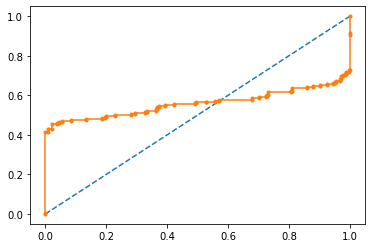

In [38]:
fpr,tpr,tresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

## Model Building - Decision Tree

In [39]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

### HyperParameter Tuning

In [41]:
tuned_parameters = [{'max_depth':[1,2,3,4,5]}]
evaluation_metric = ['accuracy','precision','recall','roc_auc']

for i in evaluation_metric:
    clf = RandomizedSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(X_test, y_test))
    print()

for accuracy
Best parameters set found on train set:
{'max_depth': 5}
DecisionTreeClassifier(max_depth=5)
0.9506726457399103

for precision
Best parameters set found on train set:
{'max_depth': 3}
DecisionTreeClassifier(max_depth=3)
0.9230769230769231

for recall
Best parameters set found on train set:
{'max_depth': 5}
DecisionTreeClassifier(max_depth=5)
0.9901960784313726

for roc_auc
Best parameters set found on train set:
{'max_depth': 5}
DecisionTreeClassifier(max_depth=5)
0.9918672014260249



In [42]:
y_pred = classifier.predict(X_test)

### F1 score

In [43]:
from sklearn import metrics
metrics.f1_score(y_test,y_pred)

0.8078602620087337

### ROC_AUC curve

0.8829201101928374


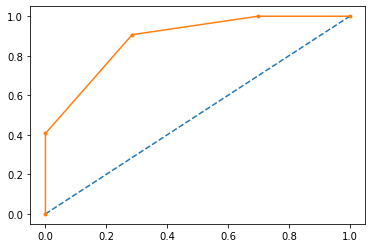

In [44]:
prob = classifier.predict_proba(X_test)
prob = prob[:,1]
roc_auc = metrics.roc_auc_score(y_test,prob)
print(roc_auc)

fpr,tpr,tresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

### Confusion Matrix

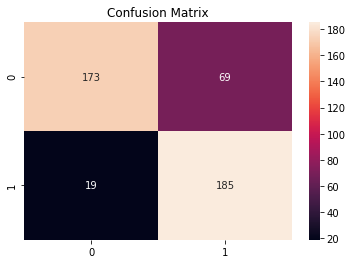

In [45]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [46]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80       242
           1       0.73      0.91      0.81       204

    accuracy                           0.80       446
   macro avg       0.81      0.81      0.80       446
weighted avg       0.82      0.80      0.80       446



## Model Building - KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### HyperParameter Tuning

In [48]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]
evaluation_metric = ['accuracy','precision','recall','roc_auc']

for i in evaluation_metric:
    clf = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
   
    print(clf.score(X_test, y_test))
    print()

for accuracy
Best parameters set found on train set:
{'p': 1, 'n_neighbors': 5}
KNeighborsClassifier(p=1)
0.952914798206278

for precision
Best parameters set found on train set:
{'p': 1, 'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2, p=1)
0.972972972972973

for recall
Best parameters set found on train set:
{'p': 3, 'n_neighbors': 5}
KNeighborsClassifier(p=3)
0.9362745098039216

for roc_auc
Best parameters set found on train set:
{'p': 1, 'n_neighbors': 5}
KNeighborsClassifier(p=1)
0.9924141144060931



In [49]:
y_pred = classifier.predict(X_test)

### F1 Score

In [50]:
from sklearn import metrics
metrics.f1_score(y_test,y_pred)

0.9478908188585609

### Confusion Matrix

In [51]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[234,   8],
       [ 13, 191]], dtype=int64)

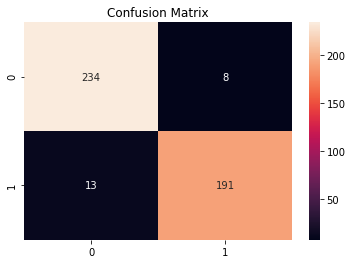

In [52]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [53]:
from sklearn import metrics

### Classification Report

In [54]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       242
           1       0.96      0.94      0.95       204

    accuracy                           0.95       446
   macro avg       0.95      0.95      0.95       446
weighted avg       0.95      0.95      0.95       446



### ROC_AUC curve

0.9948144547075028


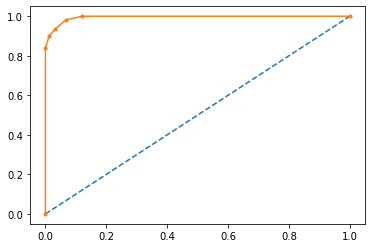

In [55]:
prob = classifier.predict_proba(X_test)
prob = prob[:,1]
roc_auc = metrics.roc_auc_score(y_test,prob)
print(roc_auc)

fpr,tpr,tresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

## Model Building - SVM

In [56]:
from sklearn.svm import SVC

### HyperParameter Tuning

In [57]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10]},
                    {'kernel': ['linear'], 'C': [1, 10]}]

evaluation_metric = ['accuracy','precision','recall','roc_auc']

for i in evaluation_metric:
    clf = RandomizedSearchCV(SVC(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print('for {}'.format(i))
    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print(clf.score(X_test, y_test))
    print()

for accuracy
Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.40078992890461695, 'C': 10}
SVC(C=10, gamma=0.40078992890461695)
0.9573991031390134

for precision
Best parameters set found on train set:
{'kernel': 'linear', 'C': 1}
SVC(C=1, kernel='linear')
1.0

for recall
Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.8910612183634541, 'C': 10}
SVC(C=10, gamma=0.8910612183634541)
0.9362745098039216

for roc_auc
Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.40078992890461695, 'C': 1}
SVC(C=1, gamma=0.40078992890461695)
0.9960703289580295



In [58]:
y_pred = classifier.predict(X_test)

### Confusion Matrix

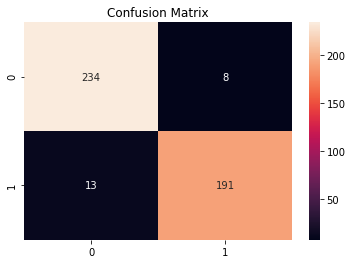

In [59]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [60]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       242
           1       0.96      0.94      0.95       204

    accuracy                           0.95       446
   macro avg       0.95      0.95      0.95       446
weighted avg       0.95      0.95      0.95       446



### F1 score

In [61]:
metrics.f1_score(y_test,y_pred)

0.9478908188585609

### ROC_AUC curve

0.9948144547075028


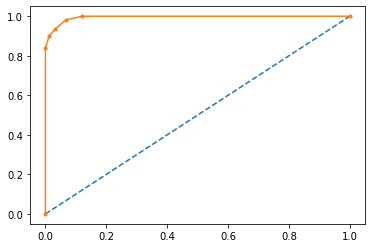

In [62]:
prob = classifier.predict_proba(X_test)
prob = prob[:,1]
roc_auc = metrics.roc_auc_score(y_test,prob)
print(roc_auc)

fpr,tpr,tresholds = metrics.roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

## Observations

### 1.Logistic Regression

- Accuracy    :   0.5919282511210763  
- Precission  :   0.5948275862068966
- Recall      :   0.3382352941176471
- F1_Score    :   0.43125
- Roc_Auc     :   0.5678982336736348

### 2.Decision Tree

- Accuracy:0.952914798206278
- Precission:0.9230769230769231
- Recall:0.9901960784313726
- F1_Score:0.8078602620087337
- Roc_Auc:0.8829201101928374


### 3.KNN

- Accuracy:0.57847533632287
- Precission:0.5869565217391305
- Recall:0.5245098039215687
- F1_Score:0.5
- Roc_Auc:0.5763044887376438


### 4.SVM

- Accuracy:0.5807174887892377
- Precission:0.5658914728682171
- Recall:0.35784313725490197
- F1_Score:0.5
- Roc_Auc:0.5667436396046022


### 1.We Observe that Decision Tree Model is giving the best one to this Data Set

### 2. KNN is giving the 2nd best model for the data set

### 3. We See that All Classification metrics giving best results in Decision tree compare to another models 